In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Exam Rules
  1. You can use your own notes and any class materials posted eClass, including Jupyter notebooks and anything else posted or linked to in eClass (however, see 4 below)
  2. You cannot use any external internet sources (e.g., Google, Wikipedia, StackExchange, etc)
  3. You can use your own books as long as they are paper or PDF
  4. You cannot use any sort of computer search functionality (internet or otherwise)
  5. You must work alone for this exam
  6. You may use any theorems proved in class
  7. Your answers do not need to be rigorous proofs, but try to be precise
  
  
 ## You must turn in your exam before midnight on Saturday (Oct 8th)
 ### (Even if you start it during the day on Saturday.)
 
 -------------------------------------------

#Q1
Consider using the function
$$g(x) = x - \frac{f(x)}{\left[\frac{f(x + f(x)) - f(x)}{f(x)}\right]}$$
for a fixed point iteration to locate the root of a given function $f(x)$.

# A 
Assume that the function $f(x)$ is sufficiently smooth, with $f'(\hat{x}) \neq 0$. Given an initial guess $x_0$ that is sufficiently close to a root $\hat{x}$, determine the convergence rate of the fixed point iteration
$$ x_{t} = g(x_{t-1}).$$

# B
Determine the convergence rate if $f'(\hat{x})=0$ and $f''(\hat{x}) \neq 0$.

# Q2

# A
Write a function in Python to compute the nodes and weights for the polynomial interpolation of the function
$$f(x) = \tanh(x), \quad x \in [-5, 5],$$
using $n+1$ Chebyshev nodes.

# B
Write a function in Python to use the Barycentric formula to evaluate a Lagrange polynomial at a given set of evaluation points.

# C
In Python, plot the function $f(x)$ using 200 points. Plot the interpolating polynomial, with 5 nodes, using 200 evaluation points.

# D
Using the results shown in lecture, determine a formula for a bound of the absolute error as a function of the number of nodes.

# E
Using the formula from part D, determine the number of nodes needed to guarantee an absolute error that is no larger than $10^{-6}$.

# F
In Python, plot the absolute error $\vert f(x) - p(x)\vert$ using the number of nodes determined in part D.

[-5.  -2.5  0.   2.5  5. ]
[ 0.5 -1.   1.  -1.   0.5]
[-0.9999092 -0.9866143  0.         0.9866143  0.9999092]


/tmp/ipykernel_78/3406359433.py:26: RuntimeWarning: divide by zero encountered in true_divide
  bary = w[:, None]/(x[None, :] - xnodes[:, None])
/tmp/ipykernel_78/3406359433.py:27: RuntimeWarning: invalid value encountered in true_divide
  yinterp = (bary*ynodes[:, None]).sum(axis=0)/bary.sum(axis=0)#Barycentric formula


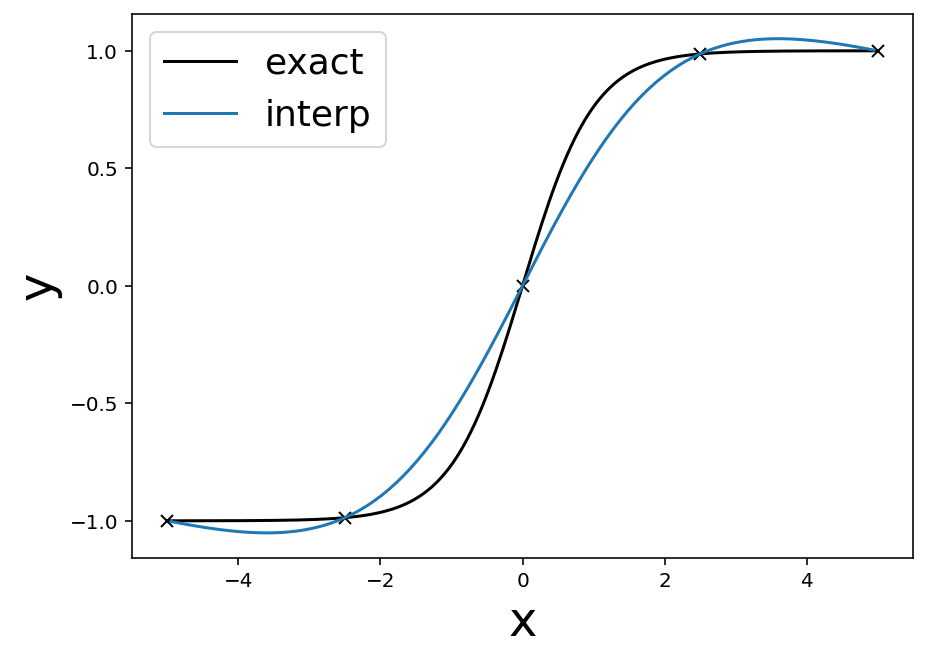

In [125]:
#Q__A
def f(x):
    return tanh(x)
    #initail function

def bary_weights_cheb(n):
    #cite week 4 code Chebyshev nodes
    j = arange(n+1)
    d = ones(n+1)
    d[0] = 0.5
    d[-1] = 0.5
    return (-1)**j*d
    #Chebyshev nodes
n=4
xnodes = linspace(-5., 5., n+1)
print(xnodes)#xnodes
w = bary_weights_cheb(n)
print(w)#weights


#Q___B
#cite week 4 code Chebyshev nodes
ynodes=f(xnodes)#f(x)
print(ynodes)#print y nodes
x = linspace(-5., 5., 200)#domain x
bary = w[:, None]/(x[None, :] - xnodes[:, None]) 
yinterp = (bary*ynodes[:, None]).sum(axis=0)/bary.sum(axis=0)#Barycentric formula

#Q___C
n=4
x = linspace(-5., 5., 200)#200 point
#plot a table
figure(1, [7, 5])#plot a table
plot(x, f(x), 'k', label='exact')#plot exact line
plot(xnodes, ynodes, 'kx')#plot the crossing point
plot(x, yinterp, label='interp')#plot the interp line
xlabel('x', fontsize=24)
ylabel('y', fontsize=24)
legend(fontsize=18)
#cite week 4 Polynomial interpolation



/tmp/ipykernel_78/3742071464.py:7: RuntimeWarning: divide by zero encountered in true_divide
  bary = w[:, None]/(x[None, :] - xnodes[:, None])
/tmp/ipykernel_78/3742071464.py:8: RuntimeWarning: invalid value encountered in true_divide
  yinterp = (bary*ynodes[:, None]).sum(axis=0)/bary.sum(axis=0)#Barycentric formula


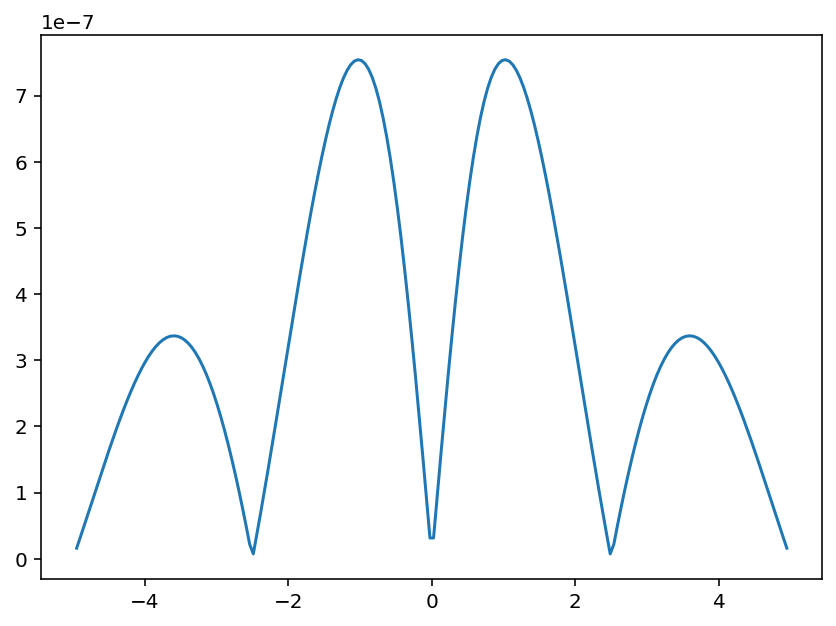

In [131]:
#QF
n=800
xnodes = linspace(-5., 5., n+1)
ynodes=f(xnodes)#f(x)
figure(2, [7, 5])#plot another table
w = bary_weights_cheb(n)#set the w under 801 nodes
bary = w[:, None]/(x[None, :] - xnodes[:, None]) 
yinterp = (bary*ynodes[:, None]).sum(axis=0)/bary.sum(axis=0)#Barycentric formula
plot(x, absolute(f(x) - yinterp), label='error')#absolutely error
#cite week 4 Polynomial interpolation